In [ ]:
# mount my drive
from google.colab import drive
drive.mount('/content/drive')


# Step 1: data collection
## demo via virtual machine / MAC  
video: https://youtu.be/GPkaUn3Yykk

## how many data is sufficient??? how many days for data collection???
"at least 2 different locations, across wide range of times(day and night, at least 3 different days"
- Week 8
  - Monday - afternoon: Main Lib   night: Law lib.
  - Tuesday - afternoon: Law lib.  night: Main Lib.
- Week 9
  - Monday - afternoon: Law lib.  night: Main Lib.
  - ... do more if you want
  
How to prove you have sufficient of data: https://edstem.org/au/courses/19019/discussion/2334511
  

## how about the channels for 2.4 GHz?
Cover all the channels for 2.4GHz (1~13)  
MACbook auto change channels: https://edstem.org/au/courses/19019/discussion/2334816  





# Step 2: Processing the data
## 2.1 Load your file with wireshark
## 2.2 Simple processing and export to csv file
  ### Features might be useful:
  - Signal Strength (RSSI): The received signal strength can impact retransmissions, as weaker signals may lead to more errors.

- Data Rate (PHY Rate): The physical layer rate (modulation and coding scheme) can influence retransmission likelihood, with higher rates potentially leading to more retransmissions if conditions aren't optimal.

- Channel Utilization: A high level of channel occupancy could indicate contention issues, leading to more retransmissions.

- Packet Size: Larger packets are more prone to retransmission errors, especially in noisy environments.

- Retry Flag: The presence of retry flags in packets indicates attempted retransmissions, directly tied to your model's target variable.

- Source and Destination MAC Addresses: Identifying APs by MAC address can help differentiate between different devices.

- Frame Type/Subtype: Different frame types (like management, control, and data frames) may exhibit varying retransmission behaviors.

- Sequence Number: Helps in identifying packet drops and repeated attempts.









## 2.3 Further processing via Pandas

## 2.3.1 read files with pandas

In [60]:
# read files with pandas
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/comp4336 project/demo_assignment.csv', encoding='latin1', index_col=0)

# show the df basic info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 195627 entries, 1 to 195627
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Time                   195627 non-null  float64
 1   Source                 166019 non-null  object 
 2   Destination            195627 non-null  object 
 3   Length                 195627 non-null  int64  
 4   Signal strength (dBm)  195627 non-null  object 
 5   Retry                  195627 non-null  object 
 6   Type/Subtype           195627 non-null  object 
 7   SSID                   65472 non-null   object 
 8   Current Channel        75850 non-null   float64
 9   Duration               195627 non-null  int64  
 10  Data rate              195627 non-null  float64
 11  Info                   195627 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 19.4+ MB


,Time,Length,Current Channel,Duration,Data rate
count,195627.000000,195627.000000,75850.000000,195627.000000,195627.000000
mean,278.313320,219.943096,5.999776,347.355508,10.778280
std,158.664797,179.188949,0.067637,1063.736726,3.316931
min,0.000000,38.000000,4.000000,0.000000,0.000000
25%,133.026983,44.000000,6.000000,0.000000,12.000000
50%,286.083839,278.000000,6.000000,0.000000,12.000000
75%,423.553608,360.000000,6.000000,214.000000,12.000000
max,530.961696,1556.000000,8.000000,32767.000000,24.000000


### 2.3.2 check the "Retry" distributions

In [64]:
# check the "Retry" distribution
print(df['Retry'].value_counts())

Retry
0    191954
1      3673
Name: count, dtype: int64


In [63]:
df

,Time,Source,Destination,Length,Signal strength (dBm),Retry,Type/Subtype,SSID,Current Channel,Duration,Data rate,Info
No.,,,,,,,,,,,,
1,0.000000,44:12:44:7b:34:d0,Broadcast,378,-63 dBm,0,Beacon frame,eduroam,6.0,0,12.0,"Beacon frame, SN=1584, FN=0, Flags=........C, ..."
2,0.001433,44:12:44:7b:34:d3,Broadcast,340,-63 dBm,0,Beacon frame,UNSW Guest,6.0,0,12.0,"Beacon frame, SN=1585, FN=0, Flags=........C, ..."
3,0.001454,44:12:44:7b:34:d4,Broadcast,351,-61 dBm,0,Beacon frame,Global_Students,6.0,0,12.0,"Beacon frame, SN=1586, FN=0, Flags=........C, ..."
4,0.001460,44:12:44:7b:34:d1,Broadcast,361,-62 dBm,0,Beacon frame,NaN,6.0,0,12.0,"Beacon frame, SN=1587, FN=0, Flags=........C, ..."
5,0.001467,NaN,f2:81:a8:2e:19:bc (f2:81:a8:2e:19:bc) (RA),38,-67 dBm,0,Acknowledgement,NaN,NaN,0,12.0,"Acknowledgement, Flags=........C"
...,...,...,...,...,...,...,...,...,...,...,...,...
195623,530.948090,44:12:44:7b:34:d4,Broadcast,351,-58 dBm,0,Beacon frame,Global_Students,6.0,0,12.0,"Beacon frame, SN=3530, FN=0, Flags=........C, ..."
195624,530.948111,44:12:44:7b:34:d1,Broadcast,361,-59 dBm,0,Beacon frame,NaN,6.0,0,12.0,"Beacon frame, SN=3531, FN=0, Flags=........C, ..."
195625,530.949469,44:12:44:7b:34:d5,Broadcast,368,-59 dBm,0,Beacon frame,uniwide,6.0,0,12.0,"Beacon frame, SN=3532, FN=0, Flags=........C, ..."


In [62]:
# process the col "Retry" -- to make it 0 or 1, 0 means it was not retransmitted, vice versa
def process_retry(x):
    if 'not being retransmitted' in x:
        return 0
    else:
        return 1
df['Retry'] = df['Retry'].apply(process_retry)
df['Retry'].unique()


array([0, 1])

<Axes: xlabel='SSID,Retry'>

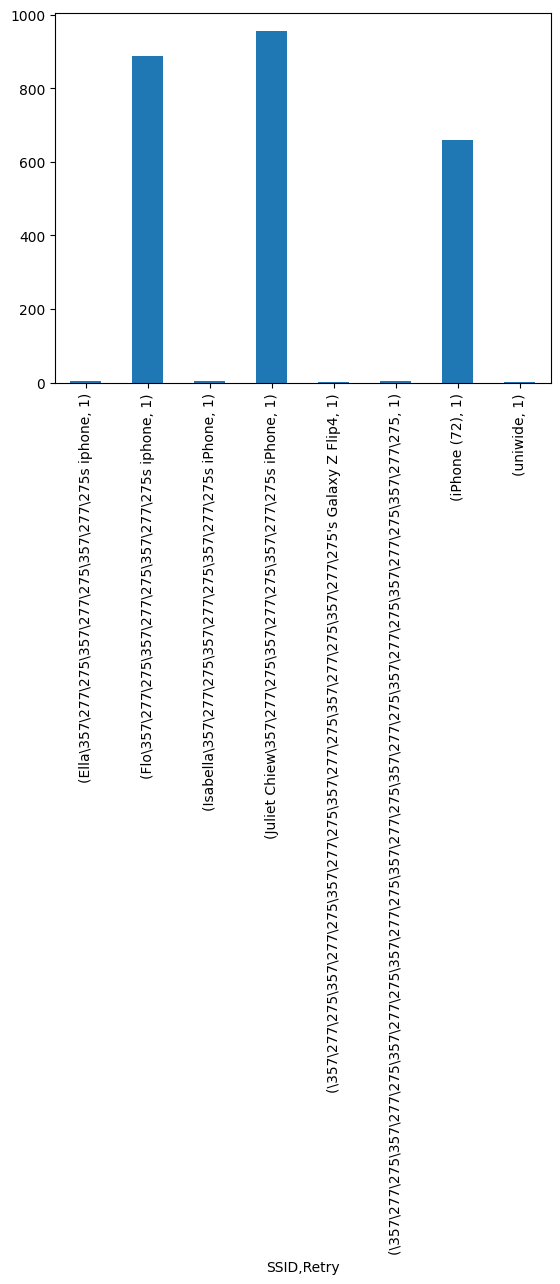

In [65]:
# # show the distributions of "Retry" groupby APs
df.groupby('SSID')['Retry'].value_counts()
# plot the bar chart for "Frame is being retransmitted" (filter the not retransmission packets)
df[df['Retry'] == 1].groupby('SSID')['Retry'].value_counts().plot(kind='bar')



In [66]:
# what is the retransmission rate for each AP?
df.groupby('SSID')['Retry'].value_counts(normalize=True)

,,proportion
SSID,Retry,
#HKAirport Free WiFi,0,1.000000
ANDAMIRO SEOCHON,0,1.000000
Aldolcevita,0,1.000000
BT-K2AF2W,0,1.000000
BT-MKCM5M,0,1.000000
Bam-Grp,0,1.000000
DB Library,0,1.000000
Diddys Iphone 4 year old,0,1.000000
Edie\357\277\275\357\277\275\357\277\275s Phone,0,1.000000


## 2.3.3 Get all the columns prepared for machine learning

In [67]:
# do all the pre-processing for the df and make it ready for the scikit-learn SVM models
# columns: ['Time', 'Source', 'Destination', 'Length', 'Signal strength (dBm)',
      #  'Retry', 'Type/Subtype', 'SSID', 'Current Channel', 'Duration',
      #  'Data rate', 'Info']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['SSID'] = le.fit_transform(df['SSID'])
df['Type/Subtype'] = le.fit_transform(df['Type/Subtype'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Data rate'] = le.fit_transform(df['Data rate'])
df['Info'] = le.fit_transform(df['Info'])
df['Current Channel'] = le.fit_transform(df['Current Channel'])
df['Time'] = le.fit_transform(df['Time'])
df['Length'] = le.fit_transform(df['Length'])
df['Signal strength (dBm)'] = le.fit_transform(df['Signal strength (dBm)'])
df['Duration'] = le.fit_transform(df['Duration'])
df['Retry'] = le.fit_transform(df['Retry'])
df['Info'] = le.fit_transform(df['Info'])
df


,Time,Source,Destination,Length,Signal strength (dBm),Retry,Type/Subtype,SSID,Current Channel,Duration,Data rate,Info
No.,,,,,,,,,,,,
1,0,316,1217,293,40,0,7,45,2,0,6,4493
2,1,319,1217,255,40,0,7,34,2,0,6,4496
3,2,320,1217,266,38,0,7,14,2,0,6,4501
4,3,317,1217,276,39,0,7,52,2,0,6,4509
5,4,1534,1976,0,44,0,2,52,5,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
195623,195622,320,1217,266,35,0,7,14,2,0,6,18400
195624,195623,317,1217,276,36,0,7,52,2,0,6,18411
195625,195624,321,1217,283,36,0,7,51,2,0,6,18420



# Step 3: Machine learning


## 3.1 Demo with scikit-learn

Training kNN...
Training Random Forest...
Training SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model Performance:

kNN:
  Accuracy: 0.9914
  Precision: 0.7586
  Recall: 0.7756
  F1-Score: 0.7670

Random Forest:
  Accuracy: 0.9936
  Precision: 0.7952
  Recall: 0.8766
  F1-Score: 0.8339

SVM:
  Accuracy: 0.9818
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000


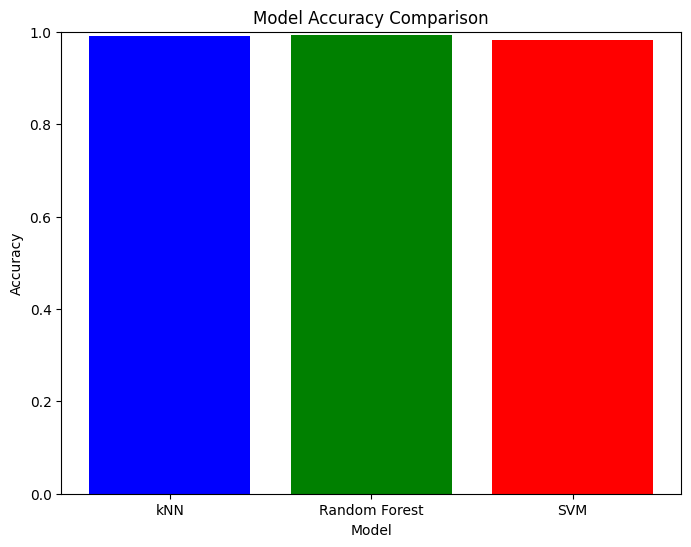

In [57]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# Assuming your preprocessed DataFrame is named 'df'
# Split the data into training and testing sets
X = df.drop('Retry', axis=1)  # Features
y = df['Retry']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'kNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# Print results
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")

# Visualization (example: Accuracy comparison)
model_names = list(results.keys())
accuracies = [results[model_name]['Accuracy'] for model_name in model_names]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.show()

## 3.2 also plot the accuracy change vs data volumn use to trained
Why: to prove you have sufficient data!  
https://edstem.org/au/courses/19019/discussion/2294313

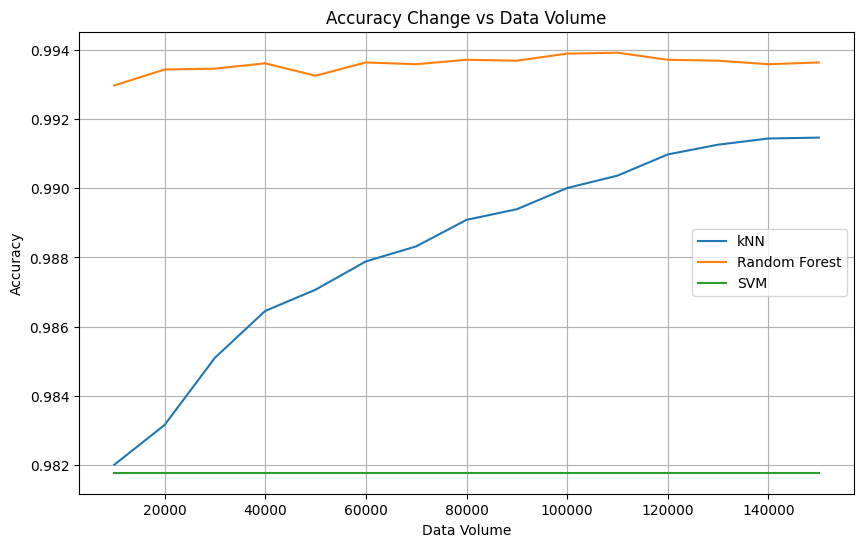

In [59]:
#

# Plot accuracy change vs data volume for each model
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    accuracy_scores = []
    data_volumes = range(10000, len(X_train) + 1, 10000)  # Vary data volume

    for data_volume in data_volumes:
        model.fit(X_train[:data_volume], y_train[:data_volume])
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    plt.plot(data_volumes, accuracy_scores, label=model_name)

plt.title('Accuracy Change vs Data Volume')
plt.xlabel('Data Volume')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
